In [9]:
import numpy as np

class Kmeans_clustering:

    def __init__(self, k=3):
        self.k = k
        self.centroids = None

    @staticmethod
    def euclidean_distance(data_points, centroids):
        return np.sqrt(np.sum((centroids - data_points)**2,axis=1))

    def fit(self, X, max_iter=200):
        self.centroids = np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0),
                                           size=(self.k, X.shape[1]))
        for _ in range(max_iter):
            y = []
            for data_points in X:
                distances = self.euclidean_distance(data_points, self.centroids)
                cluster_number = np.argmin(distances)
                y.append(cluster_number)

            y = np.array(y)

            cluster_indices = []

            for i in range(self.k):
                cluster_indices.append(np.argwhere(y == i).flatten())

            cluster_centers = np.zeros_like(self.centroids)

            for i, indices in enumerate(cluster_indices):
                if len(indices) == 0:
                    cluster_centers[i] = self.centroids[i]
                else:
                    cluster_centers[i] = np.mean(X[indices], axis=0)

            if np.max(self.centroids - cluster_centers) < 0.0001:
                break
            else:
                self.centroids = cluster_centers

        for i, centroid in enumerate(self.centroids):
            print(f"Cluster {i + 1} - Centroid: {centroid.flatten().tolist()}")
            print(f"Points in Cluster {i + 1}:\n {X[y == i]}")
            print("------------------------")

        return y

# Example usage
data = np.array([
    [45, 85],
    [50, 43],
    [40, 80],
    [55, 42],
    [200, 43],
    [48, 40],
    [195, 41],
    [43, 87],
    [190, 40]
])

kmeans = Kmeans_clustering(k=3)
final_data = kmeans.fit(data)


Cluster 1 - Centroid: [76.82370614384851, 69.17133426626782]
Points in Cluster 1:
 []
------------------------
Cluster 2 - Centroid: [195.0, 41.333333333333336]
Points in Cluster 2:
 [[200  43]
 [195  41]
 [190  40]]
------------------------
Cluster 3 - Centroid: [46.833333333333336, 62.833333333333336]
Points in Cluster 3:
 [[45 85]
 [50 43]
 [40 80]
 [55 42]
 [48 40]
 [43 87]]
------------------------


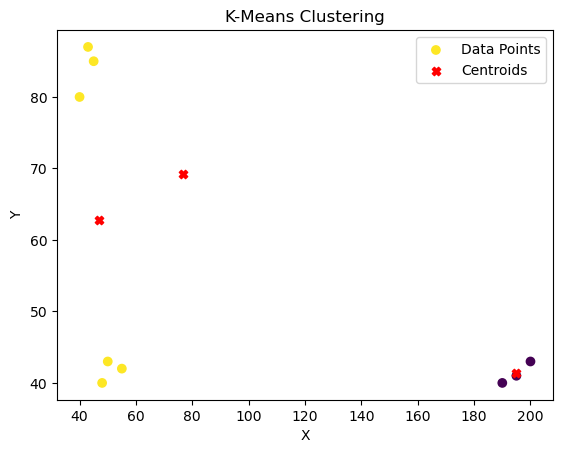

In [10]:
from matplotlib import pyplot as plt

plt.scatter(data[:, 0], data[:, 1], c=final_data, label='Data Points')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
